<a href="https://colab.research.google.com/github/shayanCS-UTD/Facebook-Metrics-Data-Analysis/blob/main/Student_Performance_Prediction_using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statements:

*   **pandas**: Used for data loading, manipulation, and analysis.
*   **numpy**: Used for numerical operations.
*   **matplotlib**: Used for creating static, interactive, and animated visualizations.
*   **seaborn**: Used for creating statistical graphics.
*   **scipy.stats**: Used for calculating skewness.
*   **sklearn.preprocessing.StandardScaler**: Used for standardizing features.
*   **sklearn.model_selection.train_test_split**: Used for splitting data into training and testing sets.
*   **sklearn.linear_model.SGDRegressor**: Used for training the Stochastic Gradient Descent regression model.
*   **sklearn.metrics.mean_squared_error**: Used for calculating the Mean Squared Error.
*   **sklearn.metrics.r2_score**: Used for calculating the R-squared score.
*   **statsmodels.api**: Used for fitting the Ordinary Least Squares (OLS) model and getting its summary.
*   **itertools.product**: Used for creating combinations of hyperparameters for tuning.

# Student Performance Prediction using Regression Models

This project analyzes student data to predict final grades (G3) using various features. The process involves data loading, cleaning, encoding categorical variables, exploring numerical data distributions and correlations, and training regression models (SGD and OLS) to predict student performance. Hyperparameter tuning is performed to optimize model performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading in and processing data


In [ ]:
# pre-processing

# load the data

url = "https://raw.githubusercontent.com/shayanCS-UTD/Facebook-Metrics-Data-Analysis/main/student-mat.csv"
df = pd.read_csv(url, sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Checking nulls and encoding categorical data into numerical

In [ ]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df[df.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.head() #trying to predict final grade

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
categorical_cols = [
    "school", "sex", "address", "famsize", "Pstatus",
    "Mjob", "Fjob", "reason", "guardian",
    "schoolsup", "famsup", "paid", "activities",
    "nursery", "higher", "internet", "romantic"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
df_encoded = df_encoded.astype(int)


In [ ]:
pd.set_option('display.max_columns', None)
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [ ]:
df2 = df_encoded

In [ ]:
df2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.883544,0.116456,0.526582,0.473418,0.222785,0.777215,0.711392,0.288608,0.103797,0.896203,0.149367,0.086076,0.356962,0.260759,0.146835,0.050633,0.045570,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013,0.870886,0.129114,0.387342,0.612658,0.541772,0.458228,0.491139,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.321177,0.321177,0.499926,0.499926,0.416643,0.416643,0.453690,0.453690,0.305384,0.305384,0.356902,0.280832,0.479711,0.439606,0.354391,0.219525,0.208814,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201,0.335751,0.335751,0.487761,0.487761,0.498884,0.498884,0.500555,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.

# Checking distribution of numerical data

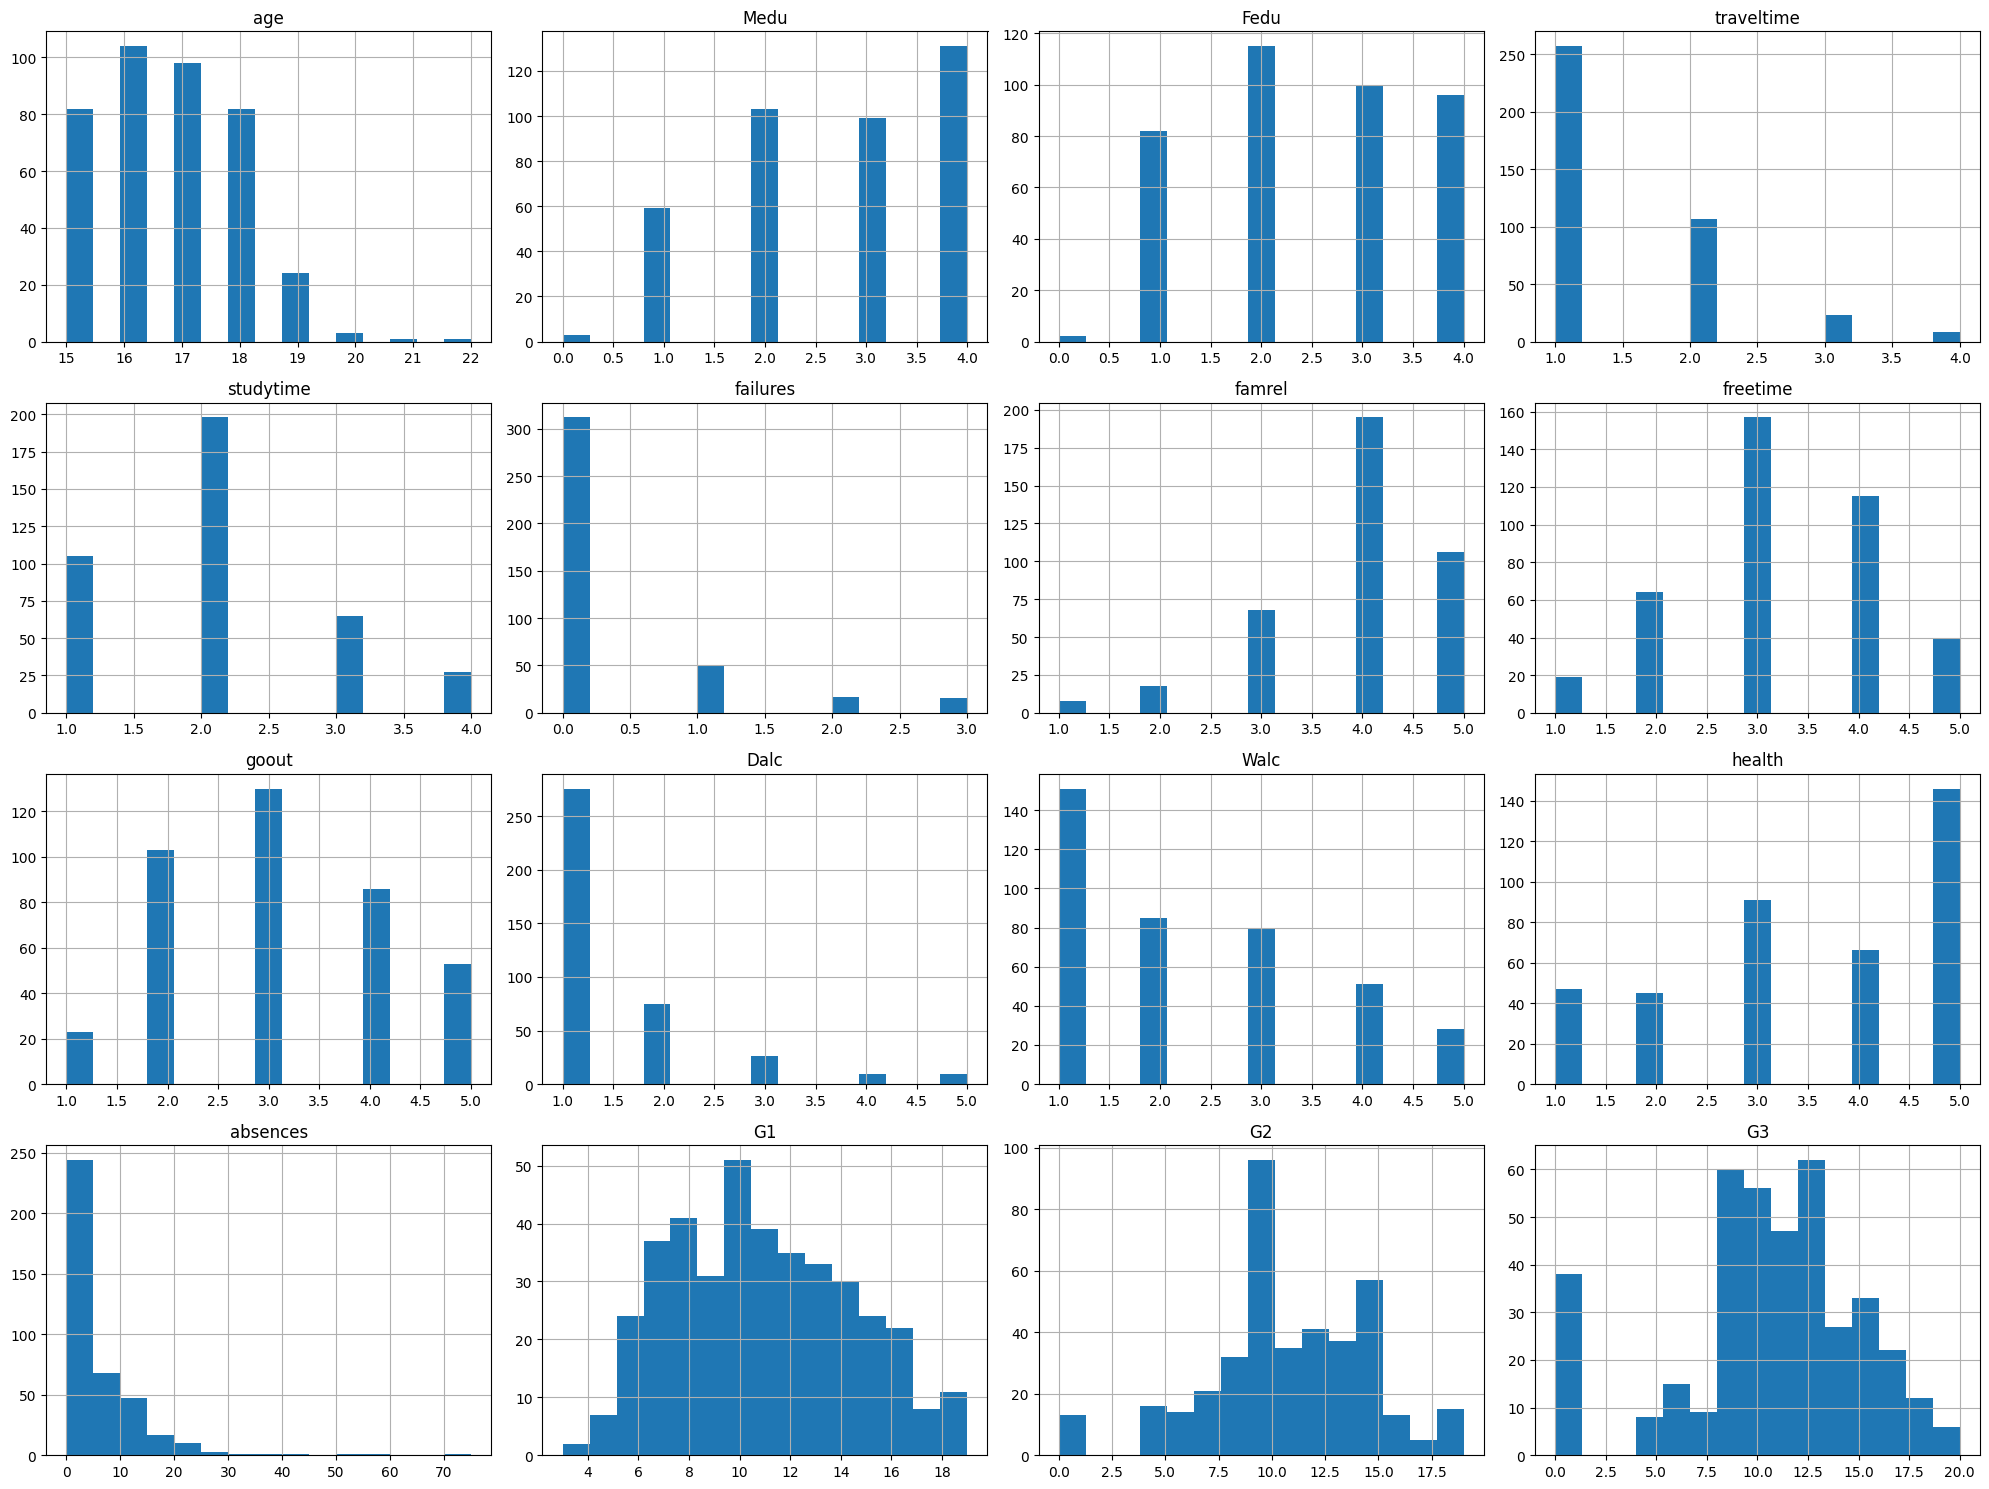

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(20, 15), bins=15)
plt.tight_layout()
plt.show()

# not including categorical

# Checking Skew

In [ ]:
from scipy.stats import skew

In [ ]:
skew_values = df[numeric_cols].apply(skew)

skew_values

,0
age,0.464498
Medu,-0.317170
Fedu,-0.031552
traveltime,1.600920
studytime,0.629739
failures,2.377951
famrel,-0.948263
freetime,-0.162730
goout,0.116060
Dalc,2.182434


# Checking normalization, standardizing and normalizing data

Correlation with Target Variable


,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
Fedu,0.152457
studytime,0.097820
famrel,0.051363
absences,0.034247
freetime,0.011307
Walc,-0.051939


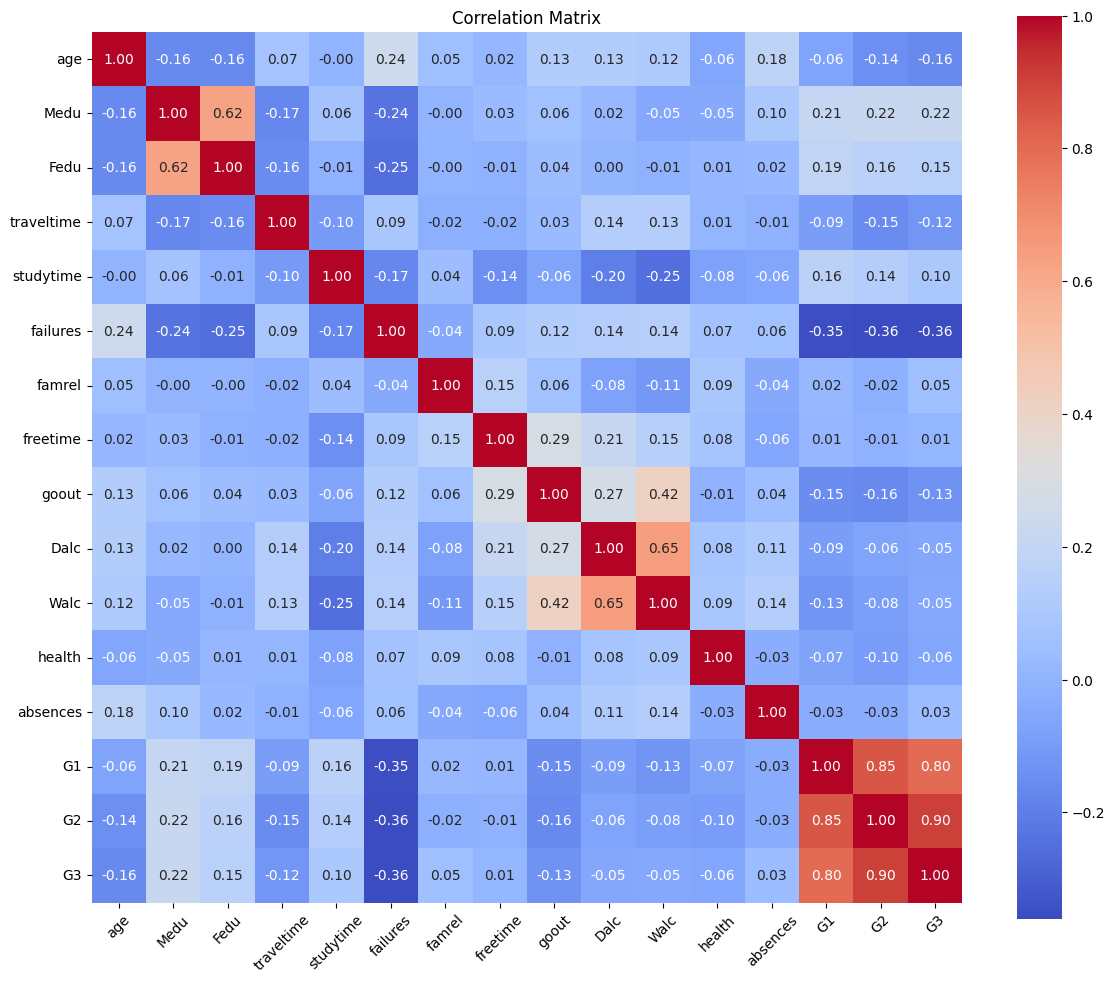

In [ ]:


targetc = 'G3'
df_clean = df.copy()
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include='number').columns.tolist()

# Include the target column in the list (ensure it's a single-element list)
cols_to_use = numeric_cols + [targetc] if targetc not in numeric_cols else numeric_cols

# Compute correlation matrix
corrs = df_clean[cols_to_use].corr()

# Display correlations with the target variable
print("Correlation with Target Variable")
# corrs[targetc] is a Series, so sort_values works directly
display(corrs[targetc].sort_values(ascending=False))

# Plot full correlation matrix using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(corrs, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features only (exclude dummy variables if you want)
numeric_features = ['age','Medu','Fedu','traveltime','studytime','failures',
                    'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Check: now mean ≈ 0 and std ≈ 1
print(df_encoded[numeric_features].mean())
print(df_encoded[numeric_features].std())

age           1.223213e-15
Medu          5.396527e-17
Fedu         -1.439074e-16
traveltime    6.295948e-17
studytime    -2.113640e-16
failures     -1.349132e-17
famrel       -1.394103e-16
freetime      1.079305e-16
goout        -1.214219e-16
Dalc          1.349132e-16
Walc         -1.798842e-16
health        7.195369e-17
absences     -5.396527e-17
G1            8.994212e-17
G2           -4.946817e-17
dtype: float64
age           1.001268
Medu          1.001268
Fedu          1.001268
traveltime    1.001268
studytime     1.001268
failures      1.001268
famrel        1.001268
freetime      1.001268
goout         1.001268
Dalc          1.001268
Walc          1.001268
health        1.001268
absences      1.001268
G1            1.001268
G2            1.001268
dtype: float64


/tmp/ipython-input-195628800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")


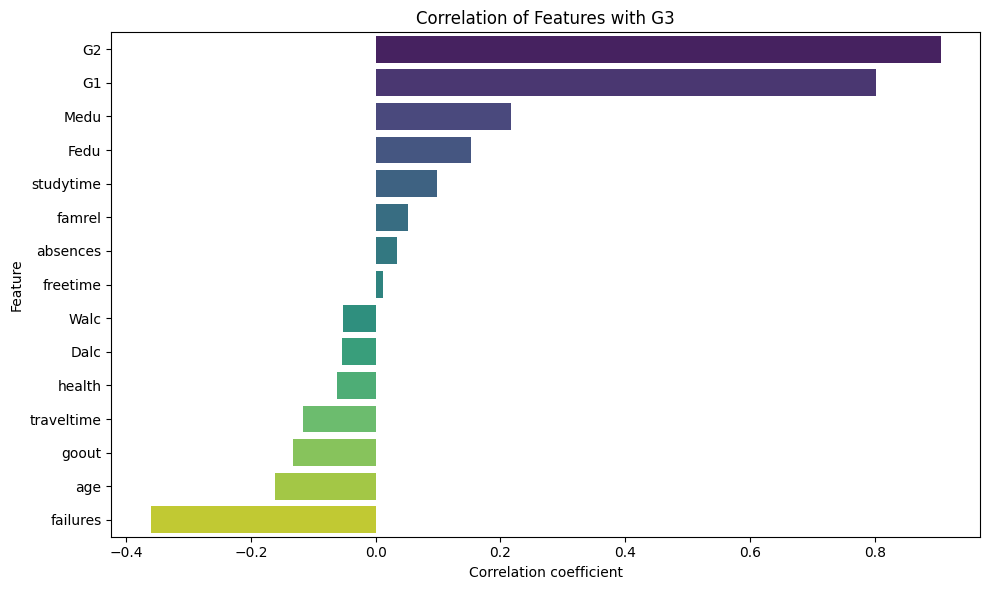

In [ ]:
corr_with_target = corrs[targetc].drop(targetc).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title(f"Correlation of Features with {targetc}")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


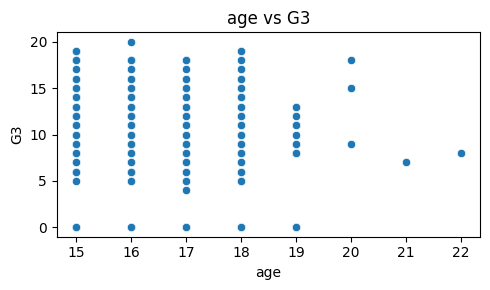

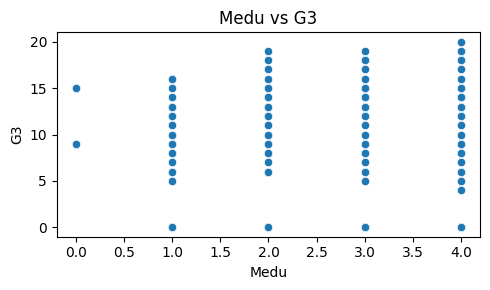

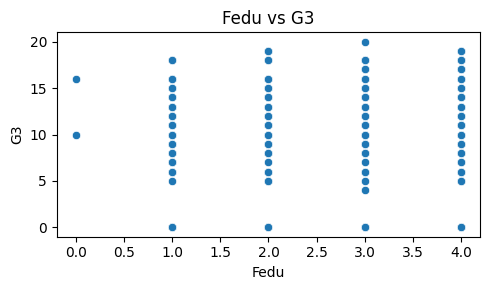

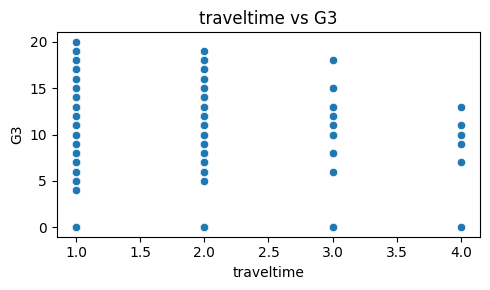

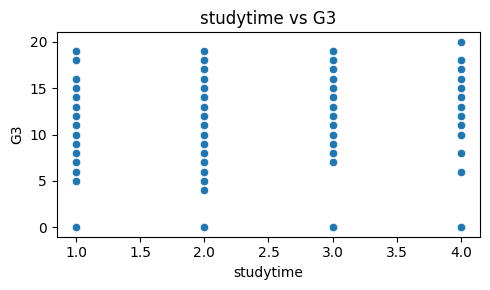

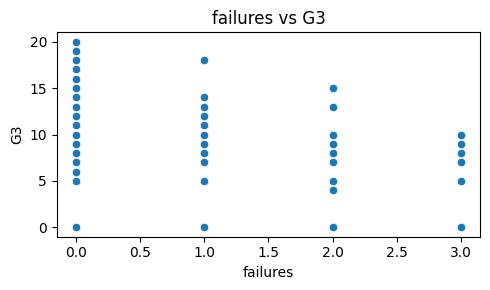

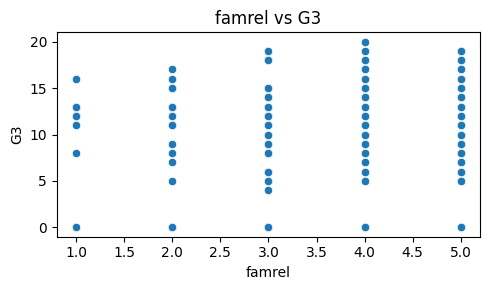

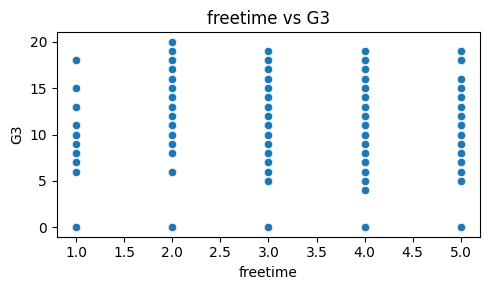

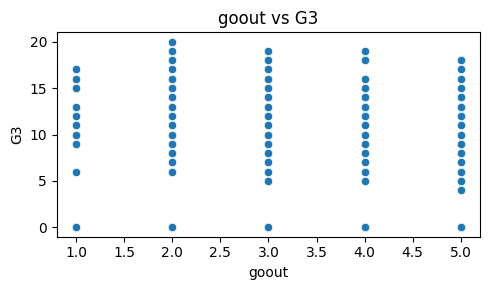

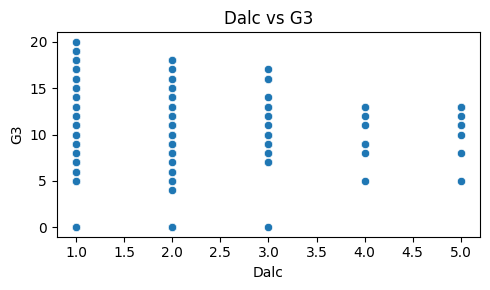

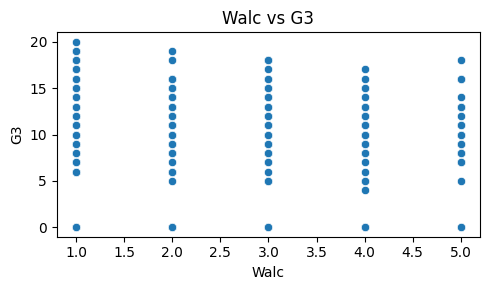

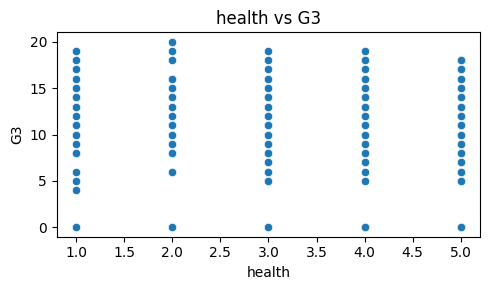

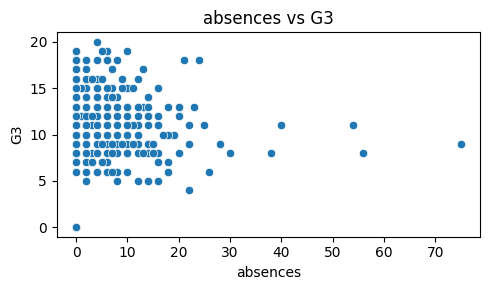

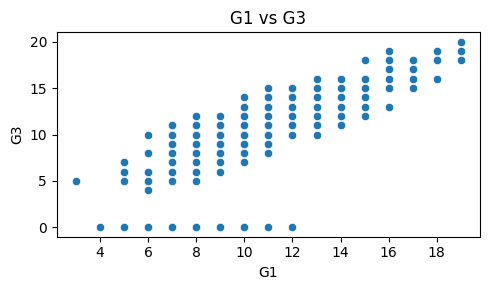

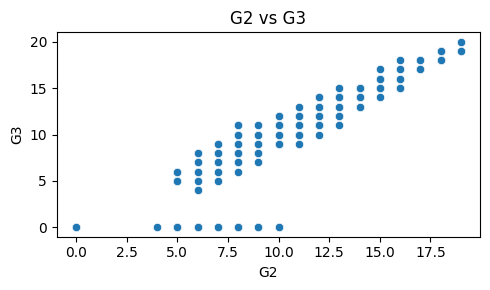

In [ ]:
for col in numeric_cols:
    if col != targetc:
        plt.figure(figsize=(5,3))
        sns.scatterplot(x=df_clean[col], y=df_clean[targetc])
        plt.title(f'{col} vs {targetc}')
        plt.xlabel(col)
        plt.ylabel(targetc)
        plt.tight_layout()
        plt.show()

# Choosing features with most correlation to G3

In [ ]:
# #- G1
# - G2
# - failures
# - Medu (optional)
# - Fedu (optional)
# - traveltime (optional)
# - goout (optional)
# - age (optional)

from sklearn.model_selection import train_test_split

# Selected features
features = ['G1', 'G2', 'Medu', 'Fedu', 'failures', 'age']
X = df_clean[features]        # Input attributes
y = df_clean['G3']            # Target variable

# Split data: 80% train, 20% test, random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check sizes
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 316 rows
Testing set size: 79 rows


# Standardizing features, creating and training sgd model with initial hyper parameters

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
sgd_model = SGDRegressor(
    loss='squared_error',   # Ordinary Least Squares loss
    penalty='l2',           # Ridge regularization (you can also try 'l1', 'elasticnet')
    alpha=0.001,            # Regularization strength
    max_iter=1000,          # Number of iterations
    learning_rate='invscaling',  # Can try 'optimal', 'adaptive', etc.
    eta0=0.01,              # Initial learning rate
    random_state=42
)

sgd_model.fit(X_train_scaled, y_train)

y_train_pred = sgd_model.predict(X_train_scaled)
y_test_pred = sgd_model.predict(X_test_scaled)

print("Training R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Training R²: 0.834976827282255
Test R²: 0.7745024805652284
Train MSE: 3.466231954853607
Test MSE: 4.623837294841627


# Visualizing the strength of the model

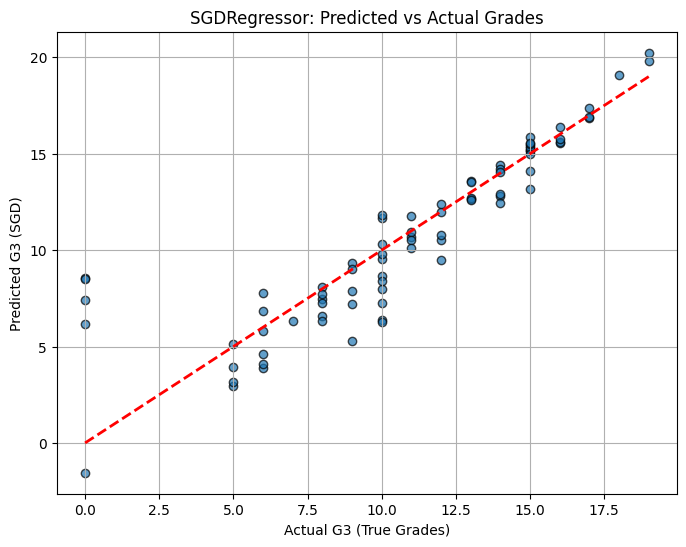

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual G3 (True Grades)")
plt.ylabel("Predicted G3 (SGD)")
plt.title("SGDRegressor: Predicted vs Actual Grades")
plt.grid(True)
plt.show()


# Creating and training OLS Model with visualization

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add constant column for intercept
X_train_ols = sm.add_constant(X_train)  # X_train is your training data (without target)
X_test_ols = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Print summary of the model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     261.2
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          8.02e-118
Time:                        03:35:07   Log-Likelihood:                -644.47
No. Observations:                 316   AIC:                             1303.
Df Residuals:                     309   BIC:                             1329.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9788      1.560      0.627      0.5

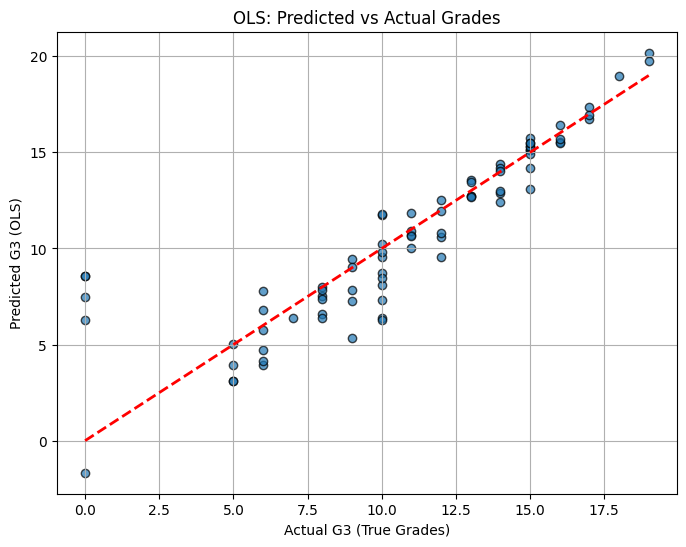

In [ ]:
# Get predictions on test set
y_pred_ols = ols_model.predict(X_test_ols)

# Scatter plot for OLS predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ols, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual G3 (True Grades)")
plt.ylabel("Predicted G3 (OLS)")
plt.title("OLS: Predicted vs Actual Grades")
plt.grid(True)
plt.show()



In [ ]:
#df.info()

In [ ]:
# df[numeric_cols].hist(figsize=(12, 8), bins=10)
# plt.tight_layout()
# plt.show()

In [ ]:
# targetc = 'G3'
# # Select numeric columns
# numeric_cols = df2.select_dtypes(include='number').columns.tolist()

# # Include the target column in the list (ensure it's a single-element list)
# cols_to_use = numeric_cols + [targetc] if targetc not in numeric_cols else numeric_cols

# # Compute correlation matrix
# corrs = df2[cols_to_use].corr()

# # Display correlations with the target variable
# print("Correlation with Target Variable")
# # corrs[targetc] is a Series, so sort_values works directly
# display(corrs[targetc].sort_values(ascending=False))

# # Plot full correlation matrix using seaborn
# plt.figure(figsize=(12,10))
# sns.heatmap(corrs, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
# plt.title("Correlation Matrix")
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# #plt.show()

# Testing different hyperparameters for SGD

In [ ]:
def run_sgd_test(X_train_scaled, X_test_scaled, y_train, y_test,
                 loss='squared_error', penalty='l2', alpha=0.001,
                 learning_rate='invscaling', eta0=0.01, max_iter=1000,
                 results_list=None):
    """
    Train SGDRegressor with given hyperparameters and store results in results_list.
    """
    # Create the model
    sgd_model = SGDRegressor(
        loss=loss,
        penalty=penalty,
        alpha=alpha,
        learning_rate=learning_rate,
        eta0=eta0,
        max_iter=max_iter,
        random_state=42
    )

    # Train
    sgd_model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = sgd_model.predict(X_train_scaled)
    y_test_pred = sgd_model.predict(X_test_scaled)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results
    if results_list is not None:
        results_list.append({
            'loss': loss,
            'penalty': penalty,
            'alpha': alpha,
            'learning_rate': learning_rate,
            'eta0': eta0,
            'max_iter': max_iter,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mse': train_mse,
            'test_mse': test_mse
        })

    # Print quick summary
    print(f"Tested: loss={loss}, penalty={penalty}, alpha={alpha}, "
          f"learning_rate={learning_rate}, eta0={eta0}, max_iter={max_iter}")
    print(f"Train R²={train_r2:.4f}, Test R²={test_r2:.4f}, "
          f"Train MSE={train_mse:.4f}, Test MSE={test_mse:.4f}\n")


In [ ]:
# Make sure sgd_results list is initialized
sgd_results = []

# Test 1 — Baseline L2 regularization
run_sgd_test(
    X_train_scaled, X_test_scaled, y_train, y_test,
    loss='squared_error', penalty='l2', alpha=0.001,
    learning_rate='invscaling', eta0=0.01, max_iter=1000,
    results_list=sgd_results
)

# Test 2 — Higher regularization strength
run_sgd_test(
    X_train_scaled, X_test_scaled, y_train, y_test,
    loss='squared_error', penalty='l2', alpha=0.01,
    learning_rate='invscaling', eta0=0.01, max_iter=1000,
    results_list=sgd_results
)

# Test 3 — L1 penalty (Lasso)
run_sgd_test(
    X_train_scaled, X_test_scaled, y_train, y_test,
    loss='squared_error', penalty='l1', alpha=0.001,
    learning_rate='adaptive', eta0=0.01, max_iter=1500,
    results_list=sgd_results
)

# Test 4 — ElasticNet (combination of L1 + L2)
run_sgd_test(
    X_train_scaled, X_test_scaled, y_train, y_test,
    loss='squared_error', penalty='elasticnet', alpha=0.001,
    learning_rate='optimal', eta0=0.001, max_iter=2000,
    results_list=sgd_results
)

# Test 5 — Robust Huber loss with L2
run_sgd_test(
    X_train_scaled, X_test_scaled, y_train, y_test,
    loss='huber', penalty='l2', alpha=0.001,
    learning_rate='adaptive', eta0=0.01, max_iter=2000,
    results_list=sgd_results
)


Tested: loss=squared_error, penalty=l2, alpha=0.001, learning_rate=invscaling, eta0=0.01, max_iter=1000
Train R²=0.8350, Test R²=0.7745, Train MSE=3.4662, Test MSE=4.6238

Tested: loss=squared_error, penalty=l2, alpha=0.01, learning_rate=invscaling, eta0=0.01, max_iter=1000
Train R²=0.8349, Test R²=0.7751, Train MSE=3.4671, Test MSE=4.6115

Tested: loss=squared_error, penalty=l1, alpha=0.001, learning_rate=adaptive, eta0=0.01, max_iter=1500
Train R²=0.8353, Test R²=0.7753, Train MSE=3.4593, Test MSE=4.6069

Tested: loss=squared_error, penalty=elasticnet, alpha=0.001, learning_rate=optimal, eta0=0.001, max_iter=2000
Train R²=0.7605, Test R²=0.6522, Train MSE=5.0315, Test MSE=7.1313

Tested: loss=huber, penalty=l2, alpha=0.001, learning_rate=adaptive, eta0=0.01, max_iter=2000
Train R²=0.8179, Test R²=0.7865, Train MSE=3.8245, Test MSE=4.3784



In [ ]:
import pandas as pd

df_sgd_results = pd.DataFrame(sgd_results)
df_sgd_results.sort_values(by='test_r2', ascending=False)


,loss,penalty,alpha,learning_rate,eta0,max_iter,train_r2,test_r2,train_mse,test_mse
4,huber,l2,0.001,adaptive,0.010,2000,0.817918,0.786472,3.824537,4.378409
2,squared_error,l1,0.001,adaptive,0.010,1500,0.835306,0.775331,3.459314,4.606854
1,squared_error,l2,0.010,invscaling,0.010,1000,0.834935,0.775105,3.467112,4.611486
0,squared_error,l2,0.001,invscaling,0.010,1000,0.834977,0.774502,3.466232,4.623837
3,squared_error,elasticnet,0.001,optimal,0.001,2000,0.760457,0.652215,5.031482,7.131345


# Finding the best hyper parameter by trying all combinations

In [ ]:
from itertools import product
from sklearn.metrics import r2_score

# Define ranges to test
losses = ['squared_error', 'huber']
penalties = ['l2', 'l1', 'elasticnet']
alphas = [0.0001, 0.001, 0.01]
etas = [0.001, 0.01, 0.1]
learning_rates = ['invscaling', 'adaptive']

best_score = -np.inf
best_params = None

# Try all combinations
for loss, penalty, alpha, eta0, lr in product(losses, penalties, alphas, etas, learning_rates):
    model = SGDRegressor(
        loss=loss,
        penalty=penalty,
        alpha=alpha,
        eta0=eta0,
        learning_rate=lr,
        max_iter=2000,
        tol=1e-3,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_test_pred)

    if r2 > best_score:
        best_score = r2
        best_params = (loss, penalty, alpha, eta0, lr)

print("Best Test R²:", best_score)
print("Best Hyperparameters:", best_params)


Best Test R²: 0.7920685308482791
Best Hyperparameters: ('huber', 'l1', 0.01, 0.01, 'adaptive')
